In [1]:
#Define colours for plotting.
colours = c(
    HAstV4_diff='#b80101',
    HAstV4='#ff9301',
    HAstV4_undiff='#ffc101',
    MLB2_diff='#7b0fa6',
    MLB2='#592bf5',
    MLB2_undiff='#679ffa',
    VA1_diff='#1a5d3a',
    VA1='#1fbd6b',
    VA1_undiff='#82de25',
    Mock_diff='#4b4b49',
    Mock='#919190',
    Mock_undiff='#c5c5c0',
    diff='#aa05b2',
    undiff='#f68ed7')

Prepare samples for modified table 

In [2]:
samples = read.table('gut_samples_mod.tsv')
#rownames(samples) = samples$V4
#colnames(samples) = c('virus','replicate','organoid_stage','id')
samples$name = paste(samples$virus, samples$replicate, samples$organoid_stage, samples$id, sep='_')
write.table(samples, 'gut_samples_mod.tsv')
samples

,virus,replicate,organoid_stage,id,name
,<chr>,<int>,<chr>,<chr>,<chr>
S22,HAstV4,1,diff,S22,HAstV4_1_diff_S22
S10,VA1,3,undiff,S10,VA1_3_undiff_S10
S23,HAstV4,2,diff,S23,HAstV4_2_diff_S23
S11,HAstV4,2,undiff,S11,HAstV4_2_undiff_S11
S24,HAstV4,3,diff,S24,HAstV4_3_diff_S24
S12,HAstV4,3,undiff,S12,HAstV4_3_undiff_S12
S16,MLB2,1,diff,S16,MLB2_1_diff_S16
S4,MLB2,1,undiff,S4,MLB2_1_undiff_S4
S17,MLB2,2,diff,S17,MLB2_2_diff_S17


In [3]:
samples$condition = paste0(samples$virus,'_',samples$organoid_stage)

viral counts

In [29]:
counts = as.matrix(read.csv('../../output/gut/counts_all_genes.csv',row.names = 1))
samples = read.table('gut_samples_mod.tsv')
genes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)

In [31]:
o = order(samples$name)
o

[1]  1 24  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  2

In [35]:
samples = samples[o,]
counts = counts[,samples$id]

In [36]:
colnames(counts)

[1] "S22" "S9"  "S23" "S11" "S24" "S12" "S16" "S4"  "S17" "S5"  "S18" "S6" 
[13] "S13" "S1"  "S14" "S2"  "S15" "S3"  "S19" "S7"  "S20" "S8"  "S21" "S10"

In [37]:
vcounts = counts[genes$gene_biotype =='viral' ,]
colnames(vcounts) = samples$name
t(vcounts[,order(colnames(vcounts))])

,HAstV4,MLB2,VA1
HAstV4_1_diff_S22,2768615,41,193554
HAstV4_1_undiff_S9,3165622,120,135554
HAstV4_2_diff_S23,2634421,48,77137
HAstV4_2_undiff_S11,2684480,61,4822
HAstV4_3_diff_S24,4398814,19,35328
HAstV4_3_undiff_S12,2731423,28,5718
MLB2_1_diff_S16,1702,54686,3481
MLB2_1_undiff_S4,1415,74246,2941
MLB2_2_diff_S17,1607,40795,4864
MLB2_2_undiff_S5,6170,91663,4520


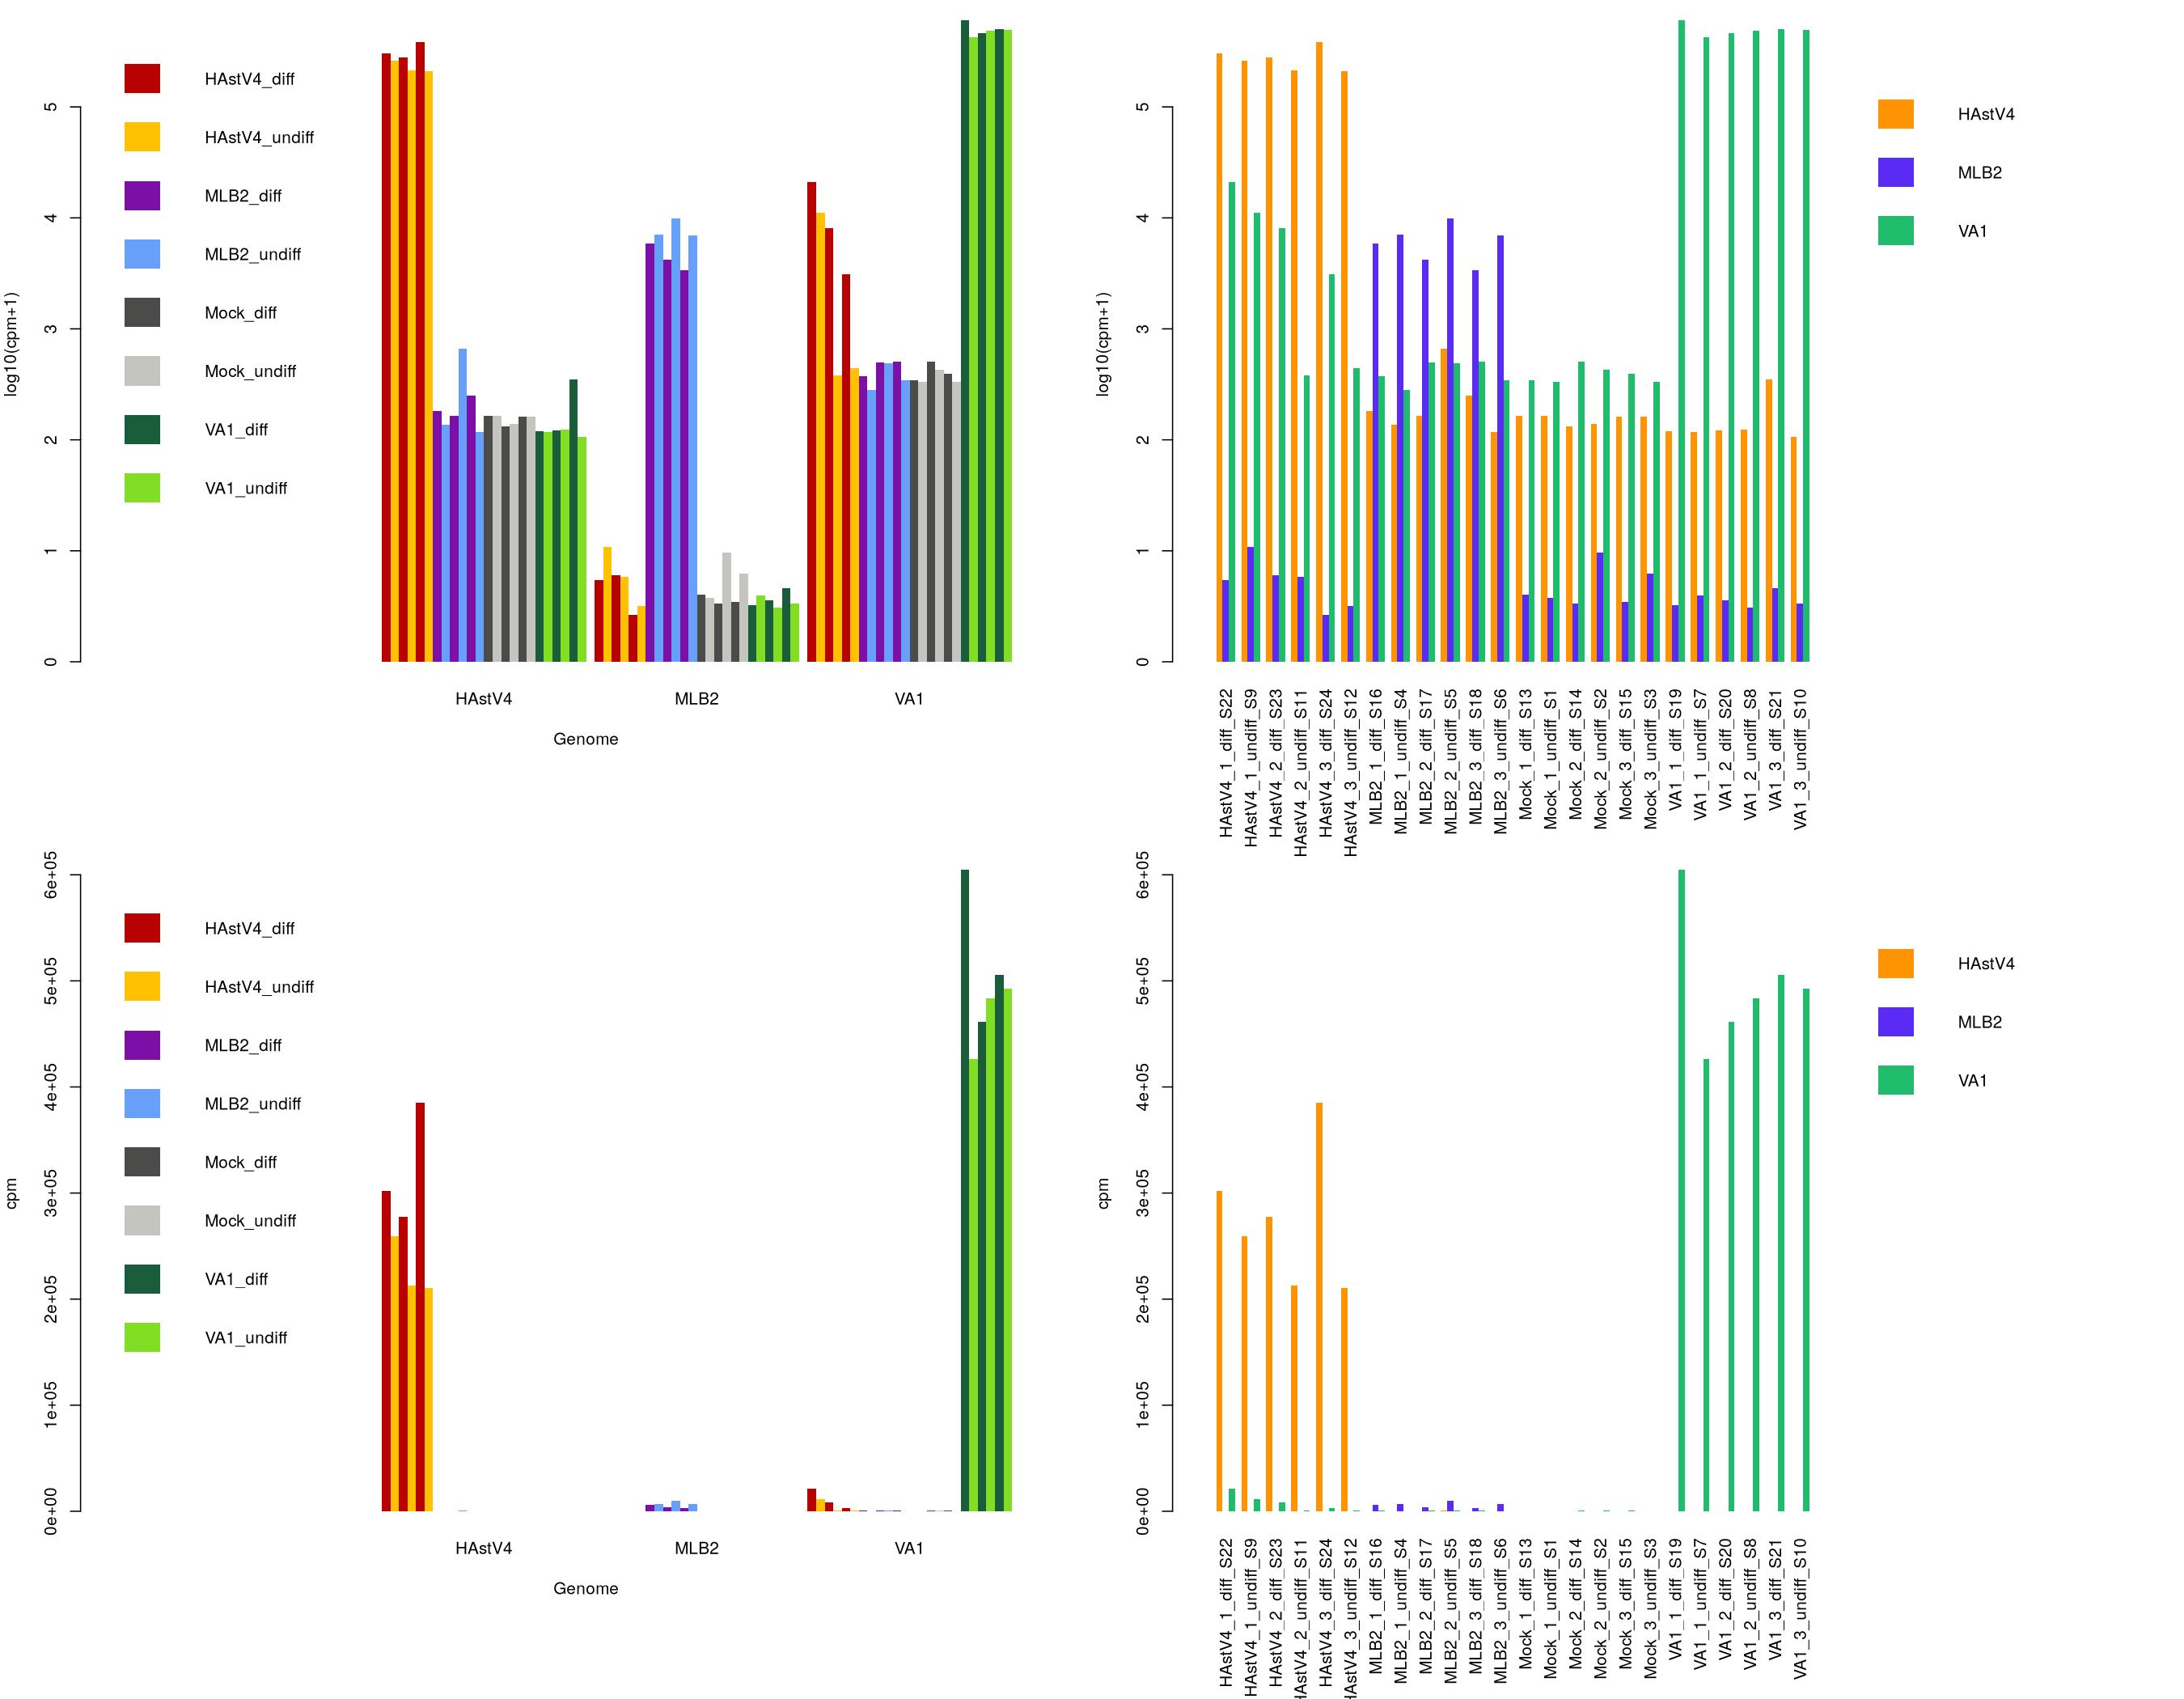

In [40]:
vcpm = sweep(vcounts,2,colSums(counts),'/')*1e6
cols=colours[paste0(samples$virus,'_',samples$organoid_stage)]
cnd = sort(unique(names(cols)))
#pdf('../../figures/gut/01_viral_expression_gut_S9vsS10.pdf',w=8,h=8.5)
par(mfrow=c(2,2),mar=c(9,4,1,0))
options(repr.plot.width = 18, repr.plot.height = 14, repr.plot.res = 150) # defaults = 7,7,120
barplot(log10(1+t(vcpm)),beside = TRUE,border=NA,xlab='Genome',ylab='log10(cpm+1)',col=cols,xlim=c(-30,80))
legend('topleft',fill=colours[cnd],legend=cnd,bty='n',border=NA)
barplot(log10(1+vcpm),beside = TRUE,border=NA,ylab='log10(cpm+1)',las=3,legend.text = TRUE,
        args.legend = list(bty='n',border=NA),col=colours[rownames(vcpm)],xlim=c(0,150))

barplot(t(vcpm),beside = TRUE,border=NA,xlab='Genome',ylab='cpm',col=cols,xlim=c(-30,80))
legend('topleft',fill=colours[cnd],legend=cnd,bty='n',border=NA)
barplot(vcpm,beside = TRUE,border=NA,ylab='cpm',las=3,legend.text = TRUE,args.legend = list(bty='n',border=NA),col=colours[rownames(vcpm)],xlim=c(0,150))
#dev.off()